In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib online

In [49]:
# importing dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

dataset.head(n= 10)  # retrun first n no. rows

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values



In [50]:
# splitting dataset into train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25 , random_state = 0)



In [51]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

#print(X_train)
#print(X_test)

In [52]:
# Fitting Classifier to train_set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [53]:
# predict test data
y_pred = classifier.predict(X_test)

In [54]:
# evaluate the prediction
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)   # 
print(accuracy_score(y_test, y_pred))

[[62  6]
 [ 3 29]]
0.91


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


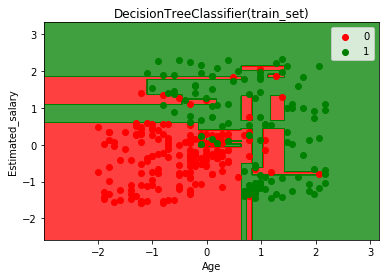

In [55]:
# visualize the train_datset

from matplotlib.colors import ListedColormap
X_set ,y_set = X_train,y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01 ),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01)) 
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75 , cmap  = ListedColormap(("red" , "green")))
# ploting the limit 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min() , X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)# plot
plt.title("DecisionTreeClassifier(train_set)")
plt.xlabel("Age")
plt.ylabel("Estimated_salary")
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


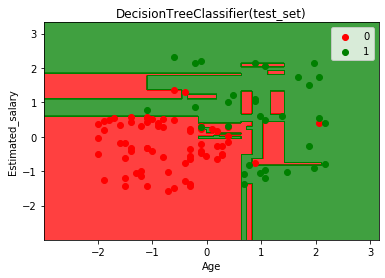

In [56]:
# visualize the test_set

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop =  X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop =  X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(("red","green")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j ,0],X_set[y_set == j ,1],
               c = ListedColormap(["red","green"])(i), label = j)
    

plt.title("DecisionTreeClassifier(test_set)")
plt.xlabel("Age")
plt.ylabel("Estimated_salary")
plt.legend()
plt.show()